In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import os
import PIL

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
#get_file is used to get the proper file from the link
#we named the data we are getting as flower_photos and we insisted to take the data from the url as origin
#we are saving the data in current file so specified as '.' we can also give address where we want to store.
#untar=True implies unzip the zip file above

In [10]:
data_dir

'./datasets/flower_photos'

In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses = list(data_dir.glob('roses/*'))

In [7]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

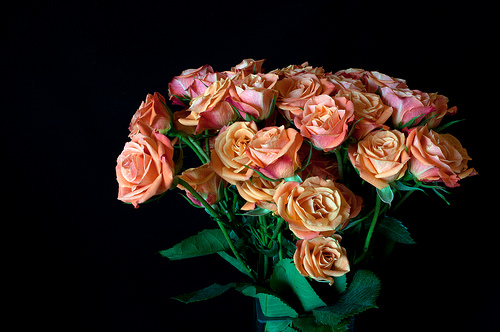

In [8]:
PIL.Image.open(str(roses[15]))

In [12]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_images_dict['tulips']

[PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2481015475_b71a12917d.jpg'),
 PosixPath('datasets/flower_photos/tulips/2418823693_72eec80f42_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16303377824_6e9128b4bd.jpg'),
 PosixPath('datasets/flower_photos/tulips/5543457754_89c44c88de_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9870557734_88eb3b9e3b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4604238410_bcec9da4a0_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713397694_bcbcbba2c2_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9444202147_405290415b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7481215720_7

In [13]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [15]:
 cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [18]:
X_train.shape

(2752, 180, 180, 3)

In [19]:
X_test.shape

(918, 180, 180, 3)

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes=5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])
score

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

In [20]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

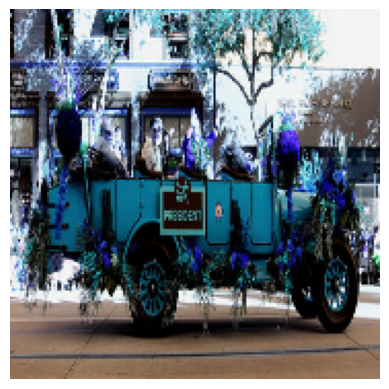

In [22]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
smaller_X = X[:10]  # Use a smaller subset for visualization
plt.axis('off')
plt.imshow(data_augmentation(smaller_X)[0].numpy().astype('uint8'))

In [ ]:
num_classes=5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)